# Use GTFlow Data as Header and Replace with FCMR Data

In [1]:
import os
import numpy as np
import numpy.matlib
import nibabel as nib
import matplotlib
import matplotlib.pyplot as plt

from __future__ import unicode_literals  # Only for python2.7 and save_as unicode filename
import pydicom
from pydicom.dataset import Dataset, FileDataset, FileMetaDataset
from pydicom.sequence import Sequence

outputDir = r'E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\dicom_fcmr_4d\dcm\codify_multi_slice'
if not os.path.exists(outputDir):
    os.makedirs(outputDir)

C:\Users\tr17\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load In FCMR Nifty Data

Shape of cine_vol nifti: (43, 44, 52, 25)
pixdim: [1.25, 1.25, 1.25, 0.01714744]
Shape of c: (43, 44, 1300)


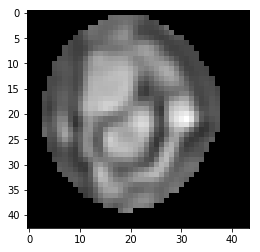

In [2]:
fcmrDir=r'E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\4D_Flow_Paper\fcmr202'

cineVolDir=r'\cine_vol'
cineVolniiFileName=r'\cine_vol.nii.gz'
cineVol_nii = nib.load(fcmrDir+cineVolDir+cineVolniiFileName)
cineVol_img = cineVol_nii.get_fdata()
print("Shape of cine_vol nifti:", cineVol_img.shape)

nX = cineVol_img.shape[0]
nY = cineVol_img.shape[1]
nZ = cineVol_img.shape[2]
nF = cineVol_img.shape[3]

dimX = cineVol_nii.header['pixdim'][1]
dimY = cineVol_nii.header['pixdim'][2]
dimZ = cineVol_nii.header['pixdim'][3]
dimF = cineVol_nii.header['pixdim'][4]
print("pixdim:", [dimX, dimY, dimZ, dimF])

c  = np.reshape(cineVol_img, [nX, nY, nZ*nF])
c[c==-1] = 0 # set background pixels = 0 (-1 in SVRTK)
c = c.astype("uint16") # convert to same datatype as DICOM
print("Shape of c:", c.shape)

plt.imshow(c[:,:,659], cmap=plt.cm.gray)
plt.show()

# Create Arrays to convert from Instance to Frame/Slice Locations

Single Frame instance number: 26
Slice number: 2
Slice location: 1.25
Frame number: 1.0
Trigger time: 0.0


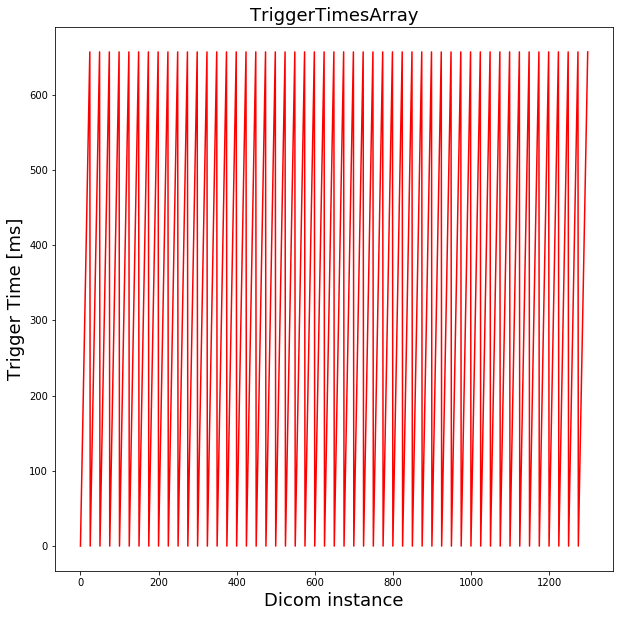

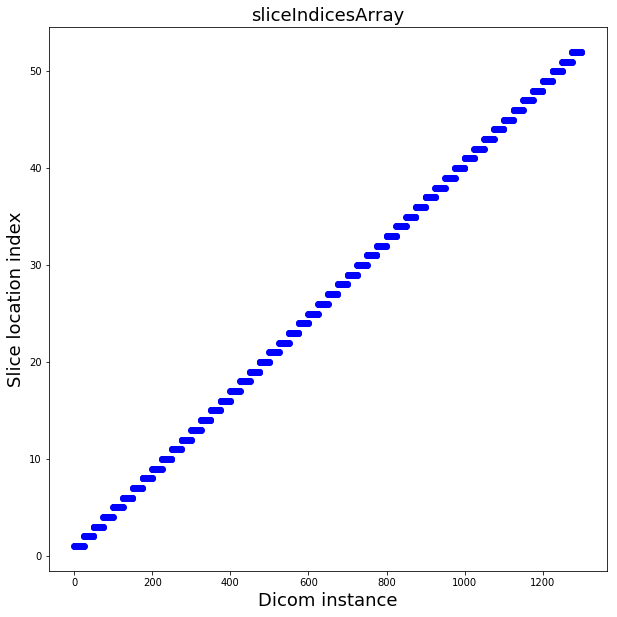

In [3]:
# range from 0 to 657ms because max trigger time in GTFlow data = 657ms.
triggerTimes = np.linspace(0.0, 657.0, num=25)
triggerTimesArray = np.matlib.repmat(triggerTimes, nZ, 1)
triggerTimesArray = triggerTimesArray.ravel()

frameNumbers = np.linspace(1, 25, num=25)
frameNumbersArray = np.matlib.repmat(frameNumbers, nZ, 1)
frameNumbersArray = frameNumbersArray.ravel()

# slice array
sliceIndices = range(1, nZ+1)
sliceIndicesArray = np.repeat(sliceIndices, nF)

# slice locations array
voxelSpacing = 1.25
zLocLast = (voxelSpacing * nZ) - voxelSpacing
sliceLoca = np.linspace(0, zLocLast, num=nZ)
sliceLocaArray = np.repeat(sliceLoca, nF)

# Test working
single_frame_instance = 26
print('Single Frame instance number:', single_frame_instance) # nb: instances count from 1
print('Slice number:', sliceIndicesArray[single_frame_instance-1])
print('Slice location:', sliceLocaArray[single_frame_instance-1])
print('Frame number:', frameNumbersArray[single_frame_instance-1])
print('Trigger time:', triggerTimesArray[single_frame_instance-1])

# Trigger Times plot
plt.figure(figsize=(10,10))
plt.plot(triggerTimesArray,'-r')
plt.xlabel('Dicom instance', fontsize=18)
plt.ylabel('Trigger Time [ms]', fontsize=18)
plt.title('TriggerTimesArray', fontsize=18)
plt.show()

# Slice Indices plot
plt.figure(figsize=(10,10))
plt.plot(sliceIndicesArray,'ob')
plt.xlabel('Dicom instance', fontsize=18)
plt.ylabel('Slice location index', fontsize=18)
plt.title('sliceIndicesArray', fontsize=18)
plt.show()

# Codify Dump - Attributes Common to All Frames/Slices

In [4]:
# Coded version of DICOM file 'E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\dicom_fcmr_4d\GTflow_Aorta\10000000\10000001\10000464\100005A3'
# Produced by pydicom codify utility script
from __future__ import unicode_literals  # Only for python2.7 and save_as unicode filename
import pydicom
from pydicom.dataset import Dataset
from pydicom.sequence import Sequence

# File meta info data elements
file_meta = Dataset()
# file_meta.FileMetaInformationGroupLength = 194 ### REQUIRES DEFINITION
file_meta.FileMetaInformationVersion = b'\x00\x01'
file_meta.MediaStorageSOPClassUID = '1.2.840.10008.5.1.4.1.1.4'
# file_meta.MediaStorageSOPInstanceUID = '1.2.40.0.13.1.75591523476291404472265359935487530723' ### REQUIRES DEFINITION
file_meta.TransferSyntaxUID = '1.2.840.10008.1.2'
file_meta.ImplementationClassUID = '1.2.276.0.7230010.3.0.3.6.1'
file_meta.ImplementationVersionName = 'OFFIS_DCMTK_361'

# Main data elements
ds = Dataset()
ds.SpecificCharacterSet = 'ISO_IR 100'
ds.ImageType = ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
ds.InstanceCreationDate = '20120821'
ds.InstanceCreationTime = '221700'
ds.InstanceCreatorUID = '1.2.40.0.13.1.203399489339977079628124438700844270739'
ds.SOPClassUID = '1.2.840.10008.5.1.4.1.1.4'
# ds.SOPInstanceUID = '1.2.40.0.13.1.75591523476291404472265359935487530723' ### REQUIRES DEFINITION
ds.StudyDate = '20120821'
ds.SeriesDate = '20120821'
ds.AcquisitionDate = '20120821'
ds.ContentDate = '20120821'
ds.StudyTime = '173207'
ds.SeriesTime = '182511.32000'
ds.AcquisitionTime = '182511.32'
ds.ContentTime = '182511.32'
ds.AccessionNumber = ''
ds.Modality = 'MR'
ds.Manufacturer = 'Philips Medical Systems'
ds.CodeValue = ''
ds.CodingSchemeDesignator = 'DCM'
ds.CodeMeaning = ''

# Procedure Code Sequence
procedure_code_sequence = Sequence()
ds.ProcedureCodeSequence = procedure_code_sequence

# Procedure Code Sequence: Procedure Code 1
procedure_code1 = Dataset()
procedure_code1.CodeValue = 'RA.MRAAOT'
procedure_code1.CodingSchemeDesignator = '99ORBIS'
procedure_code1.CodeMeaning = 'CE-MRA Aorta thorakal'
procedure_code1.ContextGroupExtensionFlag = 'N'
procedure_code_sequence.append(procedure_code1)

ds.OperatorsName = ''
ds.AdmittingDiagnosesDescription = ''
ds.ManufacturerModelName = '*'

# Referenced Performed Procedure Step Sequence
refd_performed_procedure_step_sequence = Sequence()
ds.ReferencedPerformedProcedureStepSequence = refd_performed_procedure_step_sequence

# Referenced Performed Procedure Step Sequence: Referenced Performed Procedure Step 1
refd_performed_procedure_step1 = Dataset()
refd_performed_procedure_step1.InstanceCreationDate = '20120821'
refd_performed_procedure_step1.InstanceCreationTime = '221424'
refd_performed_procedure_step1.InstanceCreatorUID = '1.2.40.0.13.1.203399489339977079628124438700844270739'
refd_performed_procedure_step1.ReferencedSOPClassUID = '1.2.840.10008.3.1.2.3.3'
refd_performed_procedure_step1.ReferencedSOPInstanceUID = '1.3.46.670589.11.17204.5.0.6524.2012082117320696006'
refd_performed_procedure_step1.InstanceNumber = "0"
refd_performed_procedure_step_sequence.append(refd_performed_procedure_step1)


# Referenced Image Sequence
refd_image_sequence = Sequence()
ds.ReferencedImageSequence = refd_image_sequence

# Referenced Image Sequence: Referenced Image 1
refd_image1 = Dataset()
refd_image1.ReferencedSOPClassUID = '1.2.840.10008.5.1.4.1.1.4'
refd_image1.ReferencedSOPInstanceUID = '1.2.40.0.13.1.89078282904346598403696206113943676723'
refd_image_sequence.append(refd_image1)

# Referenced Image Sequence: Referenced Image 2
refd_image2 = Dataset()
refd_image2.ReferencedSOPClassUID = '1.2.840.10008.5.1.4.1.1.4'
refd_image2.ReferencedSOPInstanceUID = '1.2.40.0.13.1.295129673873169057216869911833080985343'
refd_image_sequence.append(refd_image2)

# Referenced Image Sequence: Referenced Image 3
refd_image3 = Dataset()
refd_image3.ReferencedSOPClassUID = '1.2.840.10008.5.1.4.1.1.4'
refd_image3.ReferencedSOPInstanceUID = '1.2.40.0.13.1.37560432539838529536104187971339317428'
refd_image_sequence.append(refd_image3)

ds.PatientName = '-*-'
ds.PatientID = '*'
ds.IssuerOfPatientID = ''
ds.PatientBirthDate = ''
ds.OtherPatientIDs = ''
ds.OtherPatientNames = '*'
ds.PatientMotherBirthName = '*'
ds.PregnancyStatus = 4
ds.ScanningSequence = 'GR'
ds.SequenceVariant = 'SP'
ds.ScanOptions = 'FC'
ds.MRAcquisitionType = '3D'
ds.SequenceName = ''
ds.SliceThickness = "2.6"
ds.RepetitionTime = "3.58299994468688"
ds.EchoTime = "2.288"
ds.NumberOfAverages = "1"
ds.ImagingFrequency = "127.768401"
ds.ImagedNucleus = '1H'
ds.EchoNumbers = "1"
ds.MagneticFieldStrength = "3"
ds.SpacingBetweenSlices = "2.6"
ds.NumberOfPhaseEncodingSteps = "143"
ds.EchoTrainLength = "3"
ds.PercentSampling = "98.4375"
ds.PercentPhaseFieldOfView = "86.4864871376439"
ds.PixelBandwidth = "3284"
ds.SoftwareVersions = ['3.2.1', '3.2.1.0']
ds.ProtocolName = 'WIP Aorta M SENSE'
# ds.TriggerTime = "622" ### REQUIRES DEFINITION
ds.LowRRValue = "632"
ds.HighRRValue = "733"
ds.IntervalsAcquired = "1132"
ds.IntervalsRejected = "20"
ds.HeartRate = "87"
ds.ReconstructionDiameter = "379.999992370605"
ds.ReceiveCoilName = 'SENSE-XL-Torso'
ds.TransmitCoilName = 'B'
ds.AcquisitionMatrix = [0, 148, 143, 0]
ds.InPlanePhaseEncodingDirection = 'ROW'
ds.FlipAngle = "12"
ds.SAR = "0.60249835252761"
ds.dBdt = "56.7453983579957"
ds.PatientPosition = 'HFS'
ds.AcquisitionDuration = 459.6679992675781
ds.DiffusionBValue = 0.0
ds.DiffusionGradientOrientation = [0.0, 0.0, 0.0]
ds.StudyInstanceUID = '1.2.40.0.13.1.333311361771566580913219583914625766216'
ds.SeriesInstanceUID = '1.2.40.0.13.1.286595144572817015845933344548631223145'
ds.StudyID = '513842.201207030'
ds.SeriesNumber = "1006"
ds.AcquisitionNumber = "10"
# ds.InstanceNumber = "319" ### REQUIRES DEFINITION
# ds.ImagePositionPatient = ['-56.040032677094', '-189.81796011867', '225.026188065538'] ### REQUIRES DEFINITION
ds.ImageOrientationPatient = ['0.51319164037704', '0.85772150754928', '-0.0307911429554', '-0.0599991045892', '6.4554493292E-05', '-0.9981984496116']
ds.FrameOfReferenceUID = '1.2.40.0.13.1.168070265634523572089252568290704983898'
ds.TemporalPositionIdentifier = "1"
ds.NumberOfTemporalPositions = "1"
ds.PositionReferenceIndicator = ''
# ds.SliceLocation = "38.9999961150011" ### REQUIRES DEFINITION
ds.SamplesPerPixel = 1
ds.PhotometricInterpretation = 'MONOCHROME2'
# ds.Rows = 192 ### REQUIRES DEFINITION
# ds.Columns = 192 ### REQUIRES DEFINITION
ds.PixelSpacing = ['1.97916662693023', '1.97916662693023']
ds.BitsAllocated = 16
ds.BitsStored = 12
ds.HighBit = 11
ds.PixelRepresentation = 0
ds.WindowCenter = "213.04"
ds.WindowWidth = "370.49"
ds.LossyImageCompression = '00'
ds.RequestingPhysician = '*'
ds.RequestingService = '*'
ds.RequestedProcedureDescription = 'CE-MRA Aorta thorakal'
ds.PerformedStationAETitle = 'ACHIEVA3'
ds.PerformedProcedureStepStartDate = '20120821'
ds.PerformedProcedureStepStartTime = '173207'
ds.PerformedProcedureStepEndDate = '20120821'
ds.PerformedProcedureStepEndTime = '173207'
ds.PerformedProcedureStepID = '398712726'
ds.PerformedProcedureStepDescription = 'CE-MRA Aorta thorakal'

# Performed Protocol Code Sequence
performed_protocol_code_sequence = Sequence()
ds.PerformedProtocolCodeSequence = performed_protocol_code_sequence

# Performed Protocol Code Sequence: Performed Protocol Code 1
performed_protocol_code1 = Dataset()
performed_protocol_code1.CodeValue = 'RA.MRAAOT'
performed_protocol_code1.CodingSchemeDesignator = '99ORBIS'
performed_protocol_code1.CodeMeaning = 'CE-MRA Aorta thorakal'
performed_protocol_code1.ContextGroupExtensionFlag = 'N'
performed_protocol_code_sequence.append(performed_protocol_code1)


# Film Consumption Sequence
film_consumption_sequence = Sequence()
ds.FilmConsumptionSequence = film_consumption_sequence

ds.RequestedProcedureID = '513842.201207030'

# Real World Value Mapping Sequence
real_world_value_mapping_sequence = Sequence()
ds.RealWorldValueMappingSequence = real_world_value_mapping_sequence

# Real World Value Mapping Sequence: Real World Value Mapping 1
real_world_value_mapping1 = Dataset()
real_world_value_mapping1.RealWorldValueIntercept = 0.0
real_world_value_mapping1.RealWorldValueSlope = 4.280830280830281
real_world_value_mapping_sequence.append(real_world_value_mapping1)



# Attributes to Define

In [5]:
# Move to directory for writing DICOMs
os.chdir(outputDir)


# Number of files to create
numInstances = nZ*nF

for iImage in range(numInstances):
    
    iInst  = iImage + 1
    iSlice = sliceIndicesArray[iInst-1]
    iFrame = frameNumbersArray[iInst-1]
    triggerTime = triggerTimesArray[iInst-1]
    sliceLocation = sliceLocaArray[iInst-1]

#     # Debug
#     print('Instance number:', iInst )
#     print('Slice number:', iSlice)
#     print('Slice location:', sliceLocation)
#     print('Frame number:', iFrame)
#     print('Trigger time:', triggerTime)
    
    randomSOPInstanceUID = pydicom.uid.generate_uid(None)

    # file_meta.FileMetaInformationGroupLength = 194 # leave empty for now 
    
    # Define UIDs - these two are the same within a dicom frame
    file_meta.MediaStorageSOPInstanceUID = randomSOPInstanceUID
    ds.SOPInstanceUID = randomSOPInstanceUID
    
    ds.TriggerTime = str(triggerTime)
    ds.InstanceNumber = str(iInst)
    ds.ImagePositionPatient = [str(0),str(0),str(sliceLocation)]
    ds.SliceLocation = str(sliceLocation)
    
    ### OVERRIDE Fixed Codify Attributes:
    ds.Rows = nX
    ds.Columns = nY
    
    ds.WindowCenter = "1"
    ds.WindowWidth = "0.5"
    ds.PixelSpacing = [str(voxelSpacing), str(voxelSpacing)]
    real_world_value_mapping1.RealWorldValueIntercept = 0.0
    real_world_value_mapping1.RealWorldValueSlope = 1
    
    # Below essentially lifted from Codify
    ds.PresentationLUTShape = 'IDENTITY'

    ds.PixelData = c[:,:,iImage].tobytes()

    ds.file_meta = file_meta
    ds.is_implicit_VR = True
    ds.is_little_endian = True
    ds.save_as('IM_%04d'%(iInst), write_like_original=False)

    
print('DICOM creation complete.')
print('Output directory:', outputDir)

DICOM creation complete.
Output directory: E:\Users\tr17\Documents\Projects\PC_Fetal_CMR\Data\dicom_fcmr_4d\dcm\codify_multi_slice
